In [6]:
import re
from pathlib import Path

import tqdm
import pandas as pd
import geopandas as gpd

import networkx as nx

import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['default', 'science', 'no-latex'])

In [7]:
def load_dataset(city):
    
    from utils.load_data import load_metro_station_list
    
    data_folder = Path.cwd().parent / city
    
    # Load metro station list
    path = data_folder / f'metro_network_{city}.xlsx'
    data = load_metro_station_list(path, time_status='current')
    # drop duplicates
    # data = data.drop_duplicates(subset=['line_name', 'name'])
    # Select date
    data = data[data['opening_date'] <= '2024-06-30']
    # assign station id
    data = data.assign(station_id = lambda x : range(x.shape[0]))
    
    return data
# =============================================================================

In [8]:
city = 'shanghai'

data = load_dataset(city)
print('\nShape of station list data:', data.shape,
      '\nShape of data after removing duplicates:', data.drop_duplicates(subset=['line_name', 'name']).shape,
      '\nNumber of NA values:', data.isna().sum().sum())


path = Path.cwd().parent / f'{city}/boundary/boundary_gcj02.shp'
boundary = gpd.read_file(path).query('admin_leve == "6"')

Loading data: 22it [00:02, 10.56it/s]


Shape of station list data: (517, 14) 
Shape of data after removing duplicates: (517, 14) 
Number of NA values: 0


(30.907245, 31.40812)

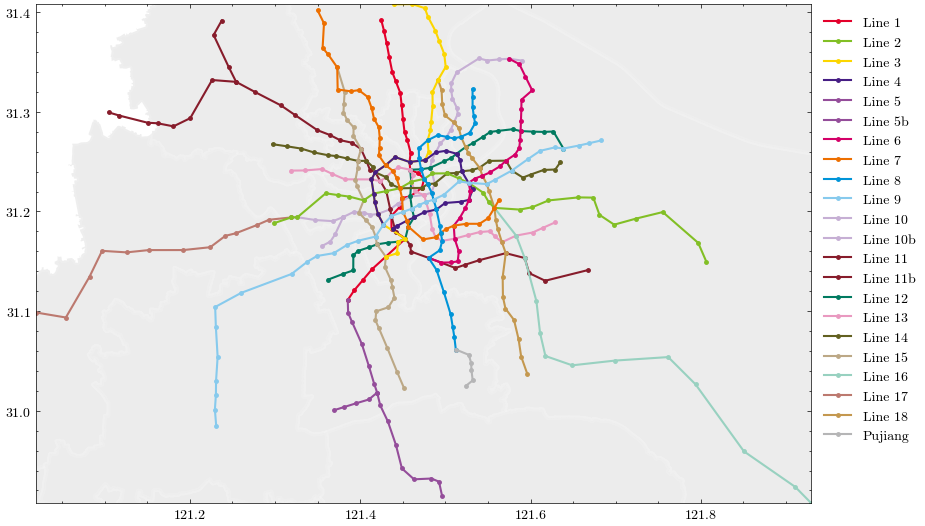

In [9]:
from codes.utils.plot_metro_network import (
    plot_metro_network_integrate_from_dataframe,
    plot_metro_network_separate_from_dataframe)


fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.set_aspect('equal', 'box')

ax = boundary.plot(ax=ax, edgecolor='white', lw=3, facecolor='grey', alpha=0.15)

ax = plot_metro_network_integrate_from_dataframe(
    data, x_col='x_gcj02', y_col='y_gcj02',
    line_kwargs={'lw': 1.5, 'markersize': 5},
    ax=ax)

ax.set_xlim([data['x_gcj02'].min(), data['x_gcj02'].max()])
ax.set_ylim([data['y_gcj02'].min(), data['y_gcj02'].max()])

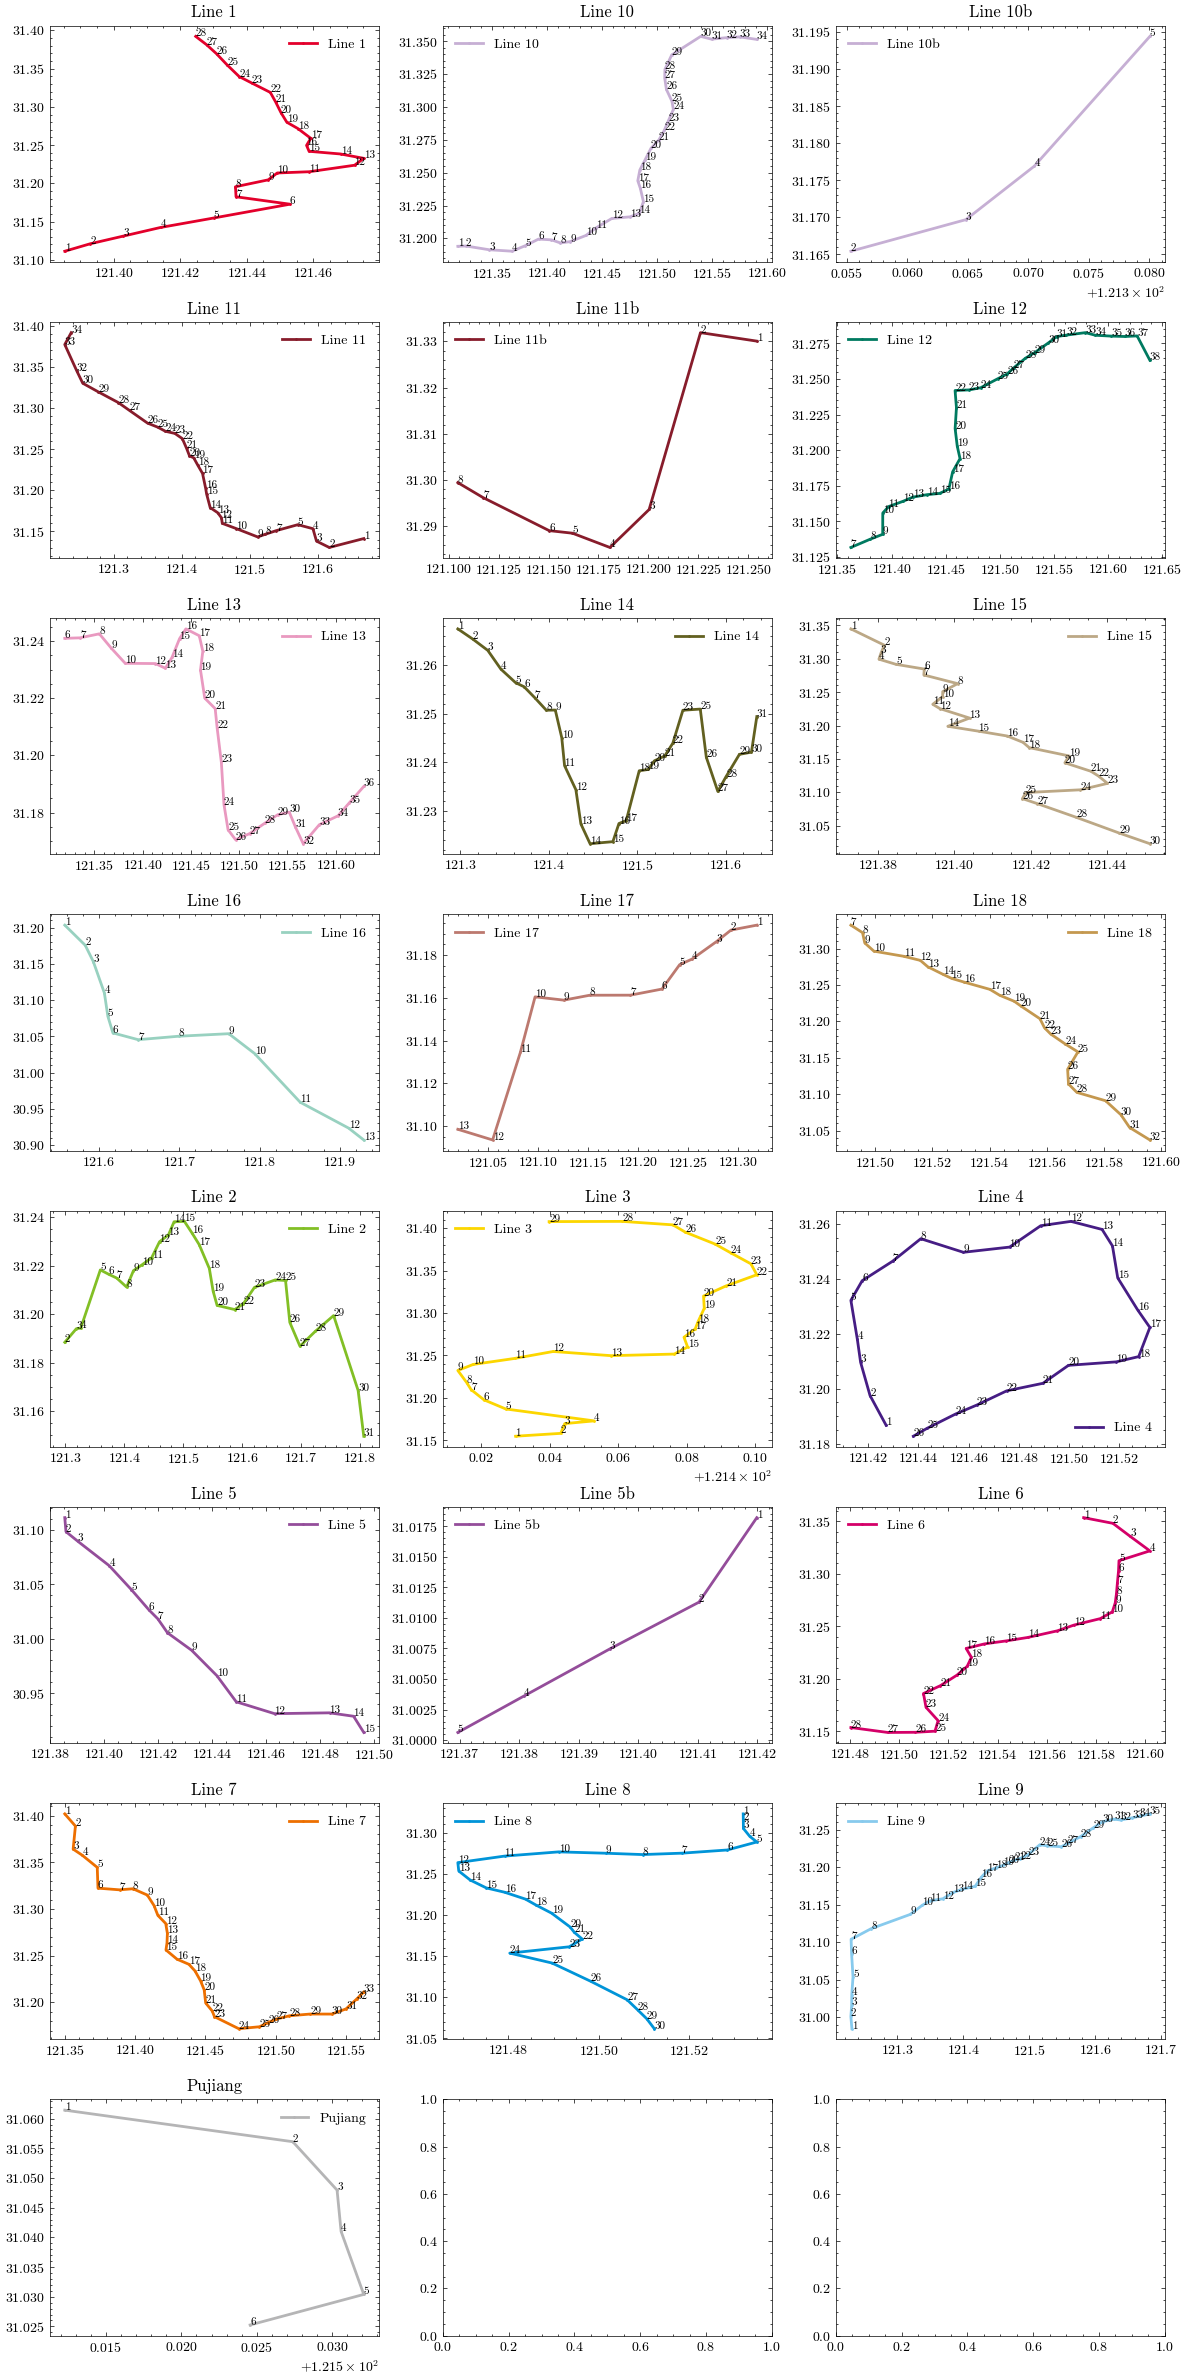

In [11]:
plot_metro_network_separate_from_dataframe(
    data, x_col='x_gcj02', y_col='y_gcj02',
    shared_axis=False, plot_background=False,
    line_kwargs={'lw': 2, 'markersize': 1})